In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [47]:
penguins = pd.read_csv('penguins_cleaned.csv')

In [48]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [49]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [50]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [51]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [52]:
penguins['species'] = penguins['species'].replace({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})

In [53]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
def encoder(df):
    encoders = {}  # To store label encoders
    for i in df.columns:
        if df[i].dtype == 'O':
            lb = LabelEncoder()
            df[i] = lb.fit_transform(df[i])
            encoders[i] = lb  # Store the encoder
    return df, encoders


In [80]:
penguins, encoders = encoder(penguins)

In [81]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181,3750,1
1,0,2,39.5,17.4,186,3800,0
2,0,2,40.3,18.0,195,3250,0
3,0,2,36.7,19.3,193,3450,0
4,0,2,39.3,20.6,190,3650,1
...,...,...,...,...,...,...,...
328,2,1,55.8,19.8,207,4000,1
329,2,1,43.5,18.1,202,3400,0
330,2,1,49.6,18.2,193,3775,1
331,2,1,50.8,19.0,210,4100,1


In [82]:
encoders

{}

In [83]:
x = penguins.drop('species', axis = 1)
y = penguins['species']

In [84]:
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181,3750,1
1,2,39.5,17.4,186,3800,0
2,2,40.3,18.0,195,3250,0
3,2,36.7,19.3,193,3450,0
4,2,39.3,20.6,190,3650,1
...,...,...,...,...,...,...
328,1,55.8,19.8,207,4000,1
329,1,43.5,18.1,202,3400,0
330,1,49.6,18.2,193,3775,1
331,1,50.8,19.0,210,4100,1


In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [87]:
x_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
22,0,40.5,17.9,187,3200,0
284,1,49.2,18.2,195,4400,1
294,1,52.8,20.0,205,4550,1
56,0,37.6,17.0,185,3600,0
175,0,47.3,15.3,222,5250,1
...,...,...,...,...,...,...
188,0,49.6,15.0,216,4750,1
71,2,37.2,19.4,184,3900,1
106,0,39.7,17.7,193,3200,0
270,1,45.2,17.8,198,3950,0


In [88]:
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test, label = y_test)

In [89]:
params = { 'max_depth': 3, 'eta': 0.1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

In [90]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds, evals = [(dtest, 'Test')])

[0]	Test-rmse:0.73967
[1]	Test-rmse:0.68107
[2]	Test-rmse:0.62997
[3]	Test-rmse:0.58642
[4]	Test-rmse:0.54798
[5]	Test-rmse:0.51708
[6]	Test-rmse:0.48924
[7]	Test-rmse:0.46767
[8]	Test-rmse:0.44796
[9]	Test-rmse:0.42846
[10]	Test-rmse:0.41112
[11]	Test-rmse:0.39846
[12]	Test-rmse:0.38619
[13]	Test-rmse:0.37614
[14]	Test-rmse:0.36798
[15]	Test-rmse:0.36222
[16]	Test-rmse:0.35673
[17]	Test-rmse:0.35145
[18]	Test-rmse:0.34721
[19]	Test-rmse:0.34219
[20]	Test-rmse:0.34068
[21]	Test-rmse:0.33975
[22]	Test-rmse:0.33929
[23]	Test-rmse:0.33921
[24]	Test-rmse:0.33943
[25]	Test-rmse:0.33638
[26]	Test-rmse:0.33620
[27]	Test-rmse:0.33692
[28]	Test-rmse:0.33738
[29]	Test-rmse:0.33830
[30]	Test-rmse:0.33942
[31]	Test-rmse:0.33924
[32]	Test-rmse:0.33910
[33]	Test-rmse:0.33902
[34]	Test-rmse:0.33773
[35]	Test-rmse:0.33738
[36]	Test-rmse:0.33710
[37]	Test-rmse:0.33690
[38]	Test-rmse:0.33675
[39]	Test-rmse:0.33664
[40]	Test-rmse:0.33657
[41]	Test-rmse:0.33650
[42]	Test-rmse:0.33644
[43]	Test-rmse:0.3364

In [91]:
predictions = model.predict(dtest)

In [92]:
predictions

array([-5.00863455e-02,  2.01083279e+00, -1.50815621e-01,  1.00082755e+00,
       -2.26033339e-03,  1.95919240e+00,  2.01121020e+00,  1.00082755e+00,
        1.00520957e+00,  1.00199664e+00,  2.57579446e-01,  5.52903581e-03,
        8.74693036e-01,  6.32853247e-03,  2.01226640e+00,  1.32485293e-02,
        3.29945306e-03,  1.00193179e+00,  3.61338165e-03,  2.01226640e+00,
        6.27781093e-01,  1.02434587e-02,  2.01679301e+00,  1.00082755e+00,
        4.89980355e-02,  4.88264970e-02,  1.00082755e+00,  2.01819468e+00,
        1.03840828e+00,  2.01501656e+00,  1.00193179e+00,  2.01396370e+00,
       -1.66163087e-01,  1.06480578e-02,  2.02832603e+00,  2.00536609e+00,
        6.39255047e-02,  1.00520957e+00,  5.27248267e-05,  3.29945306e-03,
        3.94517519e-02,  9.31997411e-03,  1.00082755e+00,  9.78396773e-01,
       -5.33755776e-03,  5.93768805e-03,  2.00745583e+00, -9.31908656e-03,
       -2.53910180e-02,  1.86939836e+00,  5.27248267e-05,  4.24100786e-01,
        9.99921560e-01,  

In [93]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.332697


In [94]:
x_train.shape

(233, 6)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
import seaborn as sns
import os
import joblib
import pickle

XGBoost has been fitted.
XGBoost Metrics:
Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1 Score: 0.98



c:\Users\Windows\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


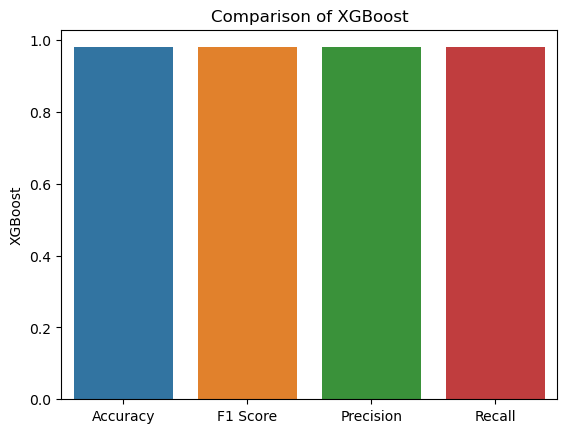

XGBoost model saved to saved_models\XGBoost.pkl


In [97]:
class models:
    def __init__(self, data, target, encoders):
        self.encoders = encoders
        x = data.drop(target, axis = 1)
        y = data[target]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


        self.models = {
            'XGBoost': xgb.XGBClassifier(use_label_encoder = False, eval_metrics = 'logloss')
        }

        self.metrics = {}
    
    def fit_models(self):
        for name, model in self.models.items():
            model.fit(self.x_train, self.y_train)
            print(f'{name} has been fitted.')

    def evaluate_models(self):

        for name, model in self.models.items():
            predictions = model.predict(self.x_test)
            accuracy = accuracy_score(self.y_test, predictions)
            precision, recall, f1, _ = precision_recall_fscore_support(self.y_test, predictions, average='weighted')
            report = classification_report(self.y_test, predictions)

            self.metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

            print(f'{name} Metrics:')
            print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}\n')

    def visualize_comparision(self):

        metrics_df = pd.DataFrame(self.metrics)
        for metric in metrics_df.columns:
            sns.barplot(x = metrics_df.index, y = metrics_df[metric])
            plt.title(f'Comparison of {metric}')
            plt.ylabel(metric)
            plt.show()

    def save_model(self, directory='saved_models'):
        if not os.path.exists(directory):
            os.makedirs(directory)

        # Save models
        for name, model in self.models.items():
            filename = os.path.join(directory, f'{name}.pkl')
            with open(filename, 'wb') as file:
                pickle.dump(model, file)
            print(f'{name} model saved to {filename}')

        # Save Label Encoders
        for col, lb in self.encoders.items():  # Change here
            joblib.dump(lb, os.path.join(directory, f'{col}_encoder.pkl'))


model = models(penguins, 'species', encoders)
model.fit_models()
model.evaluate_models()
model.visualize_comparision()
model.save_model()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

class ann:
    def __init__(self, data, target, input_shape):
        x = data.drop(target, axis=1)
        y = data[target]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.3, random_state=42)
        self.input_shape = input_shape

        self.model = {
            'NeuralNetwork': keras.Sequential([
                layers.Dense(128, activation='relu', input_shape=(self.input_shape,)),
                layers.Dense(64, activation='relu'),
                layers.Dense(32, activation='relu'),
                layers.Dense(3, activation='softmax')  # Output layer for 3 classes
            ]),
        }

        self.metrics = {}

    def compile_neural_network(self):
        if 'NeuralNetwork' in self.model:
            self.model['NeuralNetwork'].compile(optimizer='adam', 
                                                loss='sparse_categorical_crossentropy',  # Adjust based on y format
                                                metrics=['accuracy'])

    def fit_models(self):
        for name, model in self.model.items():
            model.fit(self.x_train, self.y_train, epochs=1000)  # Adjust epochs as necessary
            print(f'{name} has been fitted.')

    def evaluate_models(self):
        for name, model in self.model.items():
            predictions = model.predict(self.x_test)
            predictions = predictions.argmax(axis=1)  # Converting probabilities to class indices
            
            result = model.evaluate(self.x_test, self.y_test)

            print(f'{result}')


model = ann(penguins, 'species', 6)
model.compile_neural_network()
model.fit_models()
model.evaluate_models()


Epoch 1/1000
8/8 [==============================] - 1s 2ms/step - loss: 68.1761 - accuracy: 0.3133
Epoch 2/1000
8/8 [==============================] - 0s 1ms/step - loss: 21.0522 - accuracy: 0.3991
Epoch 3/1000
8/8 [==============================] - 0s 1ms/step - loss: 10.6648 - accuracy: 0.3133
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 7.5739 - accuracy: 0.2275
Epoch 5/1000
8/8 [==============================] - 0s 1ms/step - loss: 9.2351 - accuracy: 0.3433
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 11.3362 - accuracy: 0.3691
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 13.0293 - accuracy: 0.3391
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 5.7207 - accuracy: 0.3348
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 5.9941 - accuracy: 0.3433
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 5.0709 - accuracy: 0.2961
Epoch 11/1000


## Optimize the above Artificial Neural Network

Let's do some optimization by adding drop-out layers, early stop policy, incorporate the l2 regularizer

Epoch 1/1000
6/6 [==============================] - 1s 37ms/step - loss: 1.2944 - accuracy: 0.3387 - val_loss: 1.1750 - val_accuracy: 0.5957
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.1836 - accuracy: 0.4892 - val_loss: 1.0775 - val_accuracy: 0.8298
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.0807 - accuracy: 0.5968 - val_loss: 0.9873 - val_accuracy: 0.8085
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 1.0952 - accuracy: 0.5625

c:\Users\Windows\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 12ms/step - loss: 1.0284 - accuracy: 0.6344 - val_loss: 0.8904 - val_accuracy: 0.8085
Epoch 5/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.9974 - accuracy: 0.6452 - val_loss: 0.7946 - val_accuracy: 0.8085
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.8591 - accuracy: 0.7366 - val_loss: 0.7035 - val_accuracy: 0.8085
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.8445 - accuracy: 0.7581 - val_loss: 0.6213 - val_accuracy: 0.8298
Epoch 8/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.7504 - accuracy: 0.7634 - val_loss: 0.5481 - val_accuracy: 0.8298
Epoch 9/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6925 - accuracy: 0.7742 - val_loss: 0.4896 - val_accuracy: 0.8298
Epoch 10/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6168 - accuracy: 0.8065 - val_loss: 0.4443 - val_accuracy: 0.8298
Epoch 11/1000
6/6 [======

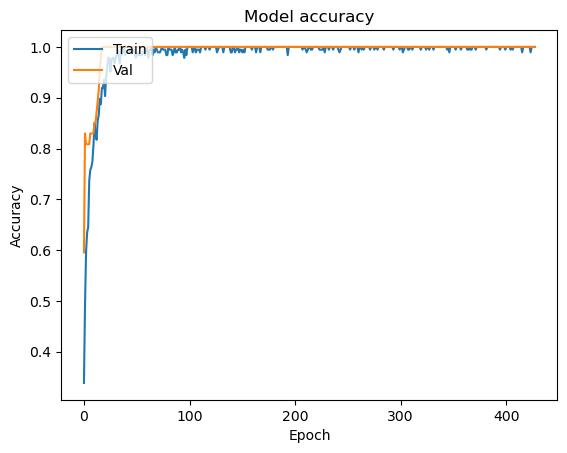

4/4 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 1.0000
Evaluation Result: [0.028002867475152016, 1.0]
NeuralNetwork model saved to saved_models\NeuralNetwork.h5


c:\Users\Windows\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


AttributeError: 'ann' object has no attribute 'encoders'

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
import numpy as np
import os
import pickle
import joblib


class ann:
    def __init__(self, data, target, input_shape):
        x = data.drop(target, axis=1)
        y = data[target]

        # Feature Scaling
        x = (x - np.mean(x)) / np.std(x)

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.3, random_state=42)
        self.input_shape = input_shape

        self.model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(self.input_shape,),
                         kernel_regularizer=regularizers.l2(0.001)), # L2 Regularization
            layers.Dropout(0.5), # Dropout
            layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.5),
            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.5),
            layers.Dense(3, activation='softmax') 
        ])

        self.metrics = {}
        self.early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)
        self.checkpoint = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

    def compile_neural_network(self):
        self.model.compile(optimizer='adam', 
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    def fit_models(self):
        history = self.model.fit(self.x_train, self.y_train, epochs=1000, 
                                 validation_split=0.2, callbacks=[self.early_stopping, self.checkpoint])
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

    def evaluate_models(self):
        self.model.load_weights('best_model.h5')
        result = self.model.evaluate(self.x_test, self.y_test)
        print(f'Evaluation Result: {result}')

    def save_model(self, directory='saved_models'):
        if not os.path.exists(directory):
            os.makedirs(directory)

        # Save the neural network model
        model_path = os.path.join(directory, 'NeuralNetwork.h5')
        self.model.save(model_path)
        print('NeuralNetwork model saved to', model_path)


        # Save encoders using joblib
        for col, encoder in self.encoders.items():  # Assuming self.encoders stores your encoders
            encoder_file = os.path.join(directory, f'{col}_encoder.pkl')
            joblib.dump(encoder, encoder_file)
            print(f'Encoder for {col} saved to {encoder_file}')



model = ann(penguins, 'species', 6)
model.compile_neural_network()
model.fit_models()
model.evaluate_models()
model.save_model()
